In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib'

In [35]:
x = np.linspace(0, 5, 100)
y = 3*x + 4 + np.random.normal(scale = 3, size = len(x))
df = pd.DataFrame({'x': x, 'y': y})
df.head()

,x,y
0,0.000000,6.155666
1,0.050505,3.685227
2,0.101010,0.668826
3,0.151515,0.410691
4,0.202020,9.582175


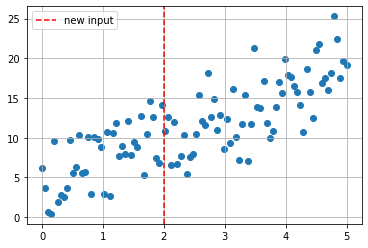

In [36]:
plt.scatter(x, y)
plt.axvline(2, color='red', linestyle = '--', label = 'new input')
plt.grid()
plt.legend();

### KNearest Neighbors

Predict the average of the $k$ nearest neighbors.  One way to think about "nearest" is euclidean distance.  We can determine the distance between each data point and the new data point at $x = 2$ with `np.linalg.norm`.  This is a more general way of determining the euclidean distance between vectors.  

In [37]:
df['distance from x = 2'] = np.linalg.norm(df[['x']] - 2, axis = 1)
df.head()

,x,y,distance from x = 2
0,0.000000,6.155666,2.000000
1,0.050505,3.685227,1.949495
2,0.101010,0.668826,1.898990
3,0.151515,0.410691,1.848485
4,0.202020,9.582175,1.797980


In [38]:
df.nsmallest(5, 'distance from x = 2')

,x,y,distance from x = 2
40,2.020202,10.817300,0.020202
39,1.969697,14.057748,0.030303
41,2.070707,12.671513,0.070707
38,1.919192,6.862097,0.080808
42,2.121212,6.627326,0.121212


In [39]:
df.nsmallest(5, 'distance from x = 2')['y'].mean()

10.20719679952342

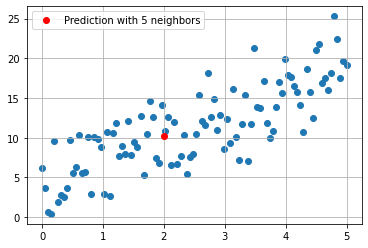

In [41]:
plt.scatter(x, y)
plt.plot(2, 10.207196799, 'ro', label = 'Prediction with 5 neighbors')
plt.grid()
plt.legend();

#### Using `sklearn`

The `KNeighborsRegressor` estimator can be used to build the KNN model.  

In [42]:
from sklearn.neighbors import KNeighborsRegressor

In [43]:
knn = KNeighborsRegressor(n_neighbors=5)

In [44]:
knn.fit(x.reshape(-1, 1), y)

KNeighborsRegressor()

In [46]:
predictions = knn.predict(x.reshape(-1, 1))

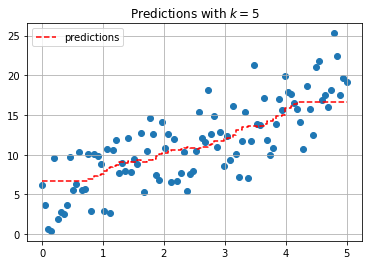

In [51]:
plt.scatter(x, y)
plt.step(x, predictions, '--r', label = 'predictions')
plt.grid()
plt.legend()
plt.title(r'Predictions with $k = 5$');

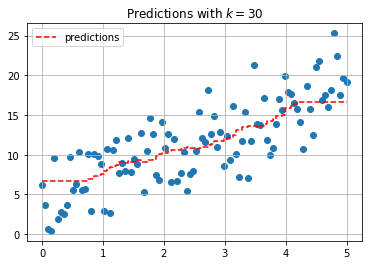

In [54]:
knn = KNeighborsRegressor(n_neighbors=30)
knn.fit(x.reshape(-1, 1), y)
predictions = knn.predict(x.reshape(-1, 1))
plt.scatter(x, y)
plt.step(x, predictions, '--r', label = 'predictions')
plt.grid()
plt.legend()
plt.title(r'Predictions with $k = 30$');

In [57]:
credit = pd.read_csv('data/Credit.csv', index_col=0)

In [58]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [59]:
X = credit[['Income', 'Limit', 'Rating', 'Cards', 'Age']]
y = credit['Balance']

In [63]:
X.head()

,Income,Limit,Rating,Cards,Age
1,14.891,3606,283,2,34
2,106.025,6645,483,3,82
3,104.593,7075,514,4,71
4,148.924,9504,681,3,36
5,55.882,4897,357,2,68


Would a difference of 10 cards or 10 Rating points be more important?

#### `StandardScaler`

One approach to scaling the data is to 

credit = pd.read_csv('data/c